In [99]:
from pytrends.request import TrendReq
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
##接続言語とタイムゾーンを渡す．
pytrends=TrendReq(hl='ja-JP',tz=360)

In [6]:
##検索キーワードと期間，国名を指定．（国名は，https://www.ncbi.nlm.nih.gov/books/NBK7249/参照）
kw_list=['Python']
pytrends.build_payload(kw_list,timeframe='2014-01-01 2018-09-30',geo='JP')

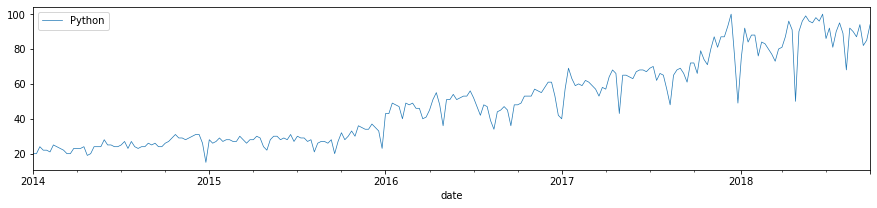

In [7]:
##
df=pytrends.interest_over_time()
df.plot(figsize=(15,3),lw=.7)

In [9]:
##数値は０〜１００の相対値
df.tail()

,Python,isPartial
date,,
2018-09-02,87,False
2018-09-09,94,False
2018-09-16,82,False
2018-09-23,85,False
2018-09-30,94,False


In [46]:
##リストの中身が４つ以上だと受け付けない
kw_list1=['JavaScript','java','Ruby']
kw_list2=['Python','PHP','SQL']

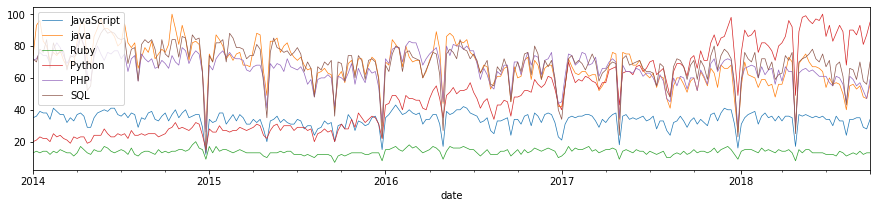

In [101]:
pytrends.build_payload(kw_list1,timeframe='2014-01-01 2018-09-30',geo='JP')
df1=pytrends.interest_over_time()
pytrends.build_payload(kw_list2,timeframe='2014-01-01 2018-09-30',geo='JP')
df2=pytrends.interest_over_time()
df=pd.concat([df1,df2],axis=1)
df.plot(figsize=(15,3),lw=.7)

In [102]:
df=df.drop(df['isPartial'],axis=1)

In [103]:
##季節性と周期性の分析
res=sm.tsa.seasonal_decompose(df['JavaScript'])

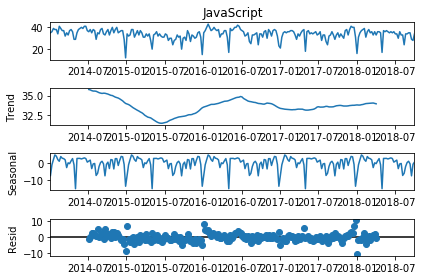

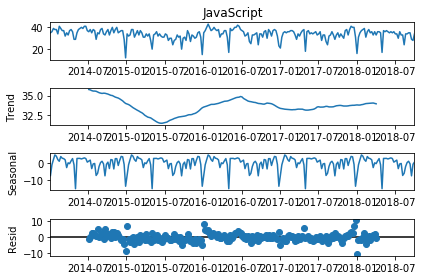

In [104]:
res.plot()

In [105]:
seasonality=pd.DataFrame()
for i in df.columns:
    res=sm.tsa.seasonal_decompose(df[i])
    ress=pd.DataFrame(res.trend)
    ress.columns=[i]
    seasonality=pd.concat([seasonality,ress],axis=1)

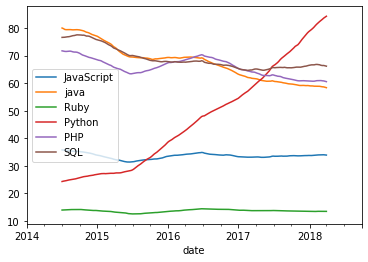

In [106]:
seasonality.plot()

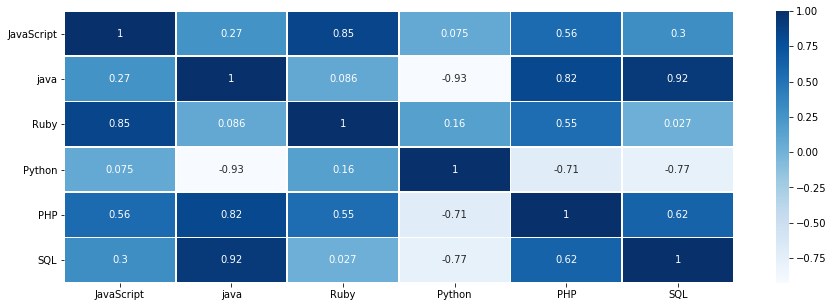

In [107]:
##相関関係の確認
r=pd.DataFrame()
for i in df.columns:
    res=sm.tsa.seasonal_decompose(df[i])
    ress=pd.DataFrame(res.trend)
    ress.columns=[i]
    r=pd.concat([r,ress],axis=1)
cor_matrix=r.corr()

plt.figure(figsize=(15,5))
sns.heatmap(cor_matrix,annot=True,lw=.7,cmap='Blues')

,JavaScript,java,Ruby,Python,PHP,SQL
JavaScript,1.000000,0.266395,0.846254,0.075341,0.562325,0.302482
java,0.266395,1.000000,0.085998,-0.925992,0.821550,0.920840
Ruby,0.846254,0.085998,1.000000,0.161693,0.547919,0.027156
Python,0.075341,-0.925992,0.161693,1.000000,-0.706352,-0.771762
PHP,0.562325,0.821550,0.547919,-0.706352,1.000000,0.620347
SQL,0.302482,0.920840,0.027156,-0.771762,0.620347,1.000000
